#Sleep Assignment
From the shared Google Drive folder, make a shortcut of the Data Folder to you own Google Drive main folder 

(go to shared with me --> SleepAssignment --> right click on the Data folder --> add shortcut)

In [ ]:
import pandas as pd
import glob
from datetime import datetime
import pandas as pd
from matplotlib.pyplot import plot
import seaborn as sns
import random
import os
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import torch
from torch import nn

Mount google drive within Google Colab, copy paste correct of Google Drive account by following the link.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
glob.glob("/content/drive/My Drive/data/*")

['/content/drive/My Drive/data/Celine_test_proximity_data.csv',
 '/content/drive/My Drive/data/Celine_test_screen_data.csv',
 '/content/drive/My Drive/data/Celine_test_light_data.csv',
 '/content/drive/My Drive/data/fongenae_proximity_data.csv',
 '/content/drive/My Drive/data/fongenae_screen_data.csv',
 '/content/drive/My Drive/data/fongenae_light_data.csv',
 '/content/drive/My Drive/data/fongenae_step_data.csv',
 '/content/drive/My Drive/data/labels.csv',
 '/content/drive/My Drive/data/Nicolas_test_proximity_data.csv',
 '/content/drive/My Drive/data/Nicolas_test_light_data.csv',
 '/content/drive/My Drive/data/Nicolas_test_screen_data.csv',
 '/content/drive/My Drive/data/patient_Diego_proximity_data.csv',
 '/content/drive/My Drive/data/patient_Diego_screen_data.csv',
 '/content/drive/My Drive/data/patient_Emiel_light_data.csv',
 '/content/drive/My Drive/data/patient_Diego_light_data.csv',
 '/content/drive/My Drive/data/patient_Emiel_noise_data.csv',
 '/content/drive/My Drive/data/patie

# Labels (times arre in UTC):

In [ ]:
pd.read_csv('/content/drive/My Drive/data/labels.csv')

,Unnamed: 0,user,begin,end
0,0,patient_Jonas,1623622759524,1623652279524
1,1,patient_Jonas,1624406119524,1624432399524
2,2,patient_Jonas,1623888439524,1623906019524
3,3,patient_Jonas,1624229359524,1624255819524
4,4,patient_Jonas,1624314619524,1624347619524
5,5,Patient_svhoecke,1623964625526,1623991265526
6,6,Patient_svhoecke,1623279185526,1623299705526
7,7,Patient_svhoecke,1623187385526,1623213665526
8,8,Patient_svhoecke,1623880385526,1623905225526
9,9,fongenae,1623195425603,1623214505603


# Data example (Times are already transformed in CET, Belgium/Brussels)

In [ ]:
pd.read_csv('/content/drive/My Drive/data/patient_Emiel_noise_data.csv')

,timestamp,source,frequency,amplitude
0,2021-06-07 16:45:25.322000+02:00,patient_Emiel.Xiaomi.Mi 9T,33.126373,44.966759
1,2021-06-07 16:45:26.077000+02:00,patient_Emiel.Xiaomi.Mi 9T,17.800629,62.480564
2,2021-06-07 16:45:26.861000+02:00,patient_Emiel.Xiaomi.Mi 9T,14.616770,57.309502
3,2021-06-07 16:45:27.665000+02:00,patient_Emiel.Xiaomi.Mi 9T,33.665497,84.811485
4,2021-06-07 16:45:28.464000+02:00,patient_Emiel.Xiaomi.Mi 9T,21.950056,82.503159
...,...,...,...,...
17936,2021-06-10 21:19:09.417000+02:00,patient_Emiel.Xiaomi.Mi 9T,6.508164,73.590538
17937,2021-06-10 21:19:10.203000+02:00,patient_Emiel.Xiaomi.Mi 9T,18.861982,66.014946
17938,2021-06-10 21:19:10.987000+02:00,patient_Emiel.Xiaomi.Mi 9T,8.715911,55.116837
17939,2021-06-10 21:19:11.803000+02:00,patient_Emiel.Xiaomi.Mi 9T,13.950315,55.546207


Read label data

In [ ]:
label = pd.read_csv('/content/drive/My Drive/data/labels.csv')
label.describe()

,Unnamed: 0,begin,end
count,33.00000,3.300000e+01,3.300000e+01
mean,16.00000,1.623697e+12,1.623721e+12
std,9.66954,4.270924e+08,4.270321e+08
min,0.00000,1.623015e+12,1.623042e+12
25%,8.00000,1.623211e+12,1.623222e+12
50%,16.00000,1.623794e+12,1.623821e+12
75%,24.00000,1.624056e+12,1.624057e+12
max,32.00000,1.624406e+12,1.624432e+12


In [ ]:
def convert_to_hour_string(x, pos):
    return datetime.utcfromtimestamp(x).strftime('%H')

def convert_to_day_string(x, pos):
    return datetime.utcfromtimestamp(x).strftime('%m-%d')

def to_date_time(df):
  df['time_dt'] = pd.to_datetime(df['timestamp'])
  df['day'] = df['time_dt'].dt.day
  df['hour'] = df['time_dt'].dt.hour
  return df



# 1. Observe and preprocess labels

Transform time

In [ ]:
label['begin'] = [int(x/1000) if x > 10000000000 else x for x in label['begin']]
label['begin_ts'] = label['begin'].apply(lambda x : datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
label['end'] = [int(x/1000) if x > 10000000000 else x for x in label['end']]
label['end_ts'] = label['end'].apply(lambda x : datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
label['begin_ts'] = pd.to_datetime(label['begin_ts'])
label['end_ts'] = pd.to_datetime(label['end_ts'])
label['begin_day'] = label['begin_ts'].dt.day
label['begin_hour'] = label['begin_ts'].dt.hour
label['end_day'] = label['end_ts'].dt.day
label['end_hour'] = label['end_ts'].dt.hour
label

,Unnamed: 0,user,begin,end,begin_ts,end_ts,begin_day,begin_hour,end_day,end_hour
0,0,patient_Jonas,1623622759,1623652279,2021-06-13 22:19:19,2021-06-14 06:31:19,13,22,14,6
1,1,patient_Jonas,1624406119,1624432399,2021-06-22 23:55:19,2021-06-23 07:13:19,22,23,23,7
2,2,patient_Jonas,1623888439,1623906019,2021-06-17 00:07:19,2021-06-17 05:00:19,17,0,17,5
3,3,patient_Jonas,1624229359,1624255819,2021-06-20 22:49:19,2021-06-21 06:10:19,20,22,21,6
4,4,patient_Jonas,1624314619,1624347619,2021-06-21 22:30:19,2021-06-22 07:40:19,21,22,22,7
5,5,Patient_svhoecke,1623964625,1623991265,2021-06-17 21:17:05,2021-06-18 04:41:05,17,21,18,4
6,6,Patient_svhoecke,1623279185,1623299705,2021-06-09 22:53:05,2021-06-10 04:35:05,9,22,10,4
7,7,Patient_svhoecke,1623187385,1623213665,2021-06-08 21:23:05,2021-06-09 04:41:05,8,21,9,4
8,8,Patient_svhoecke,1623880385,1623905225,2021-06-16 21:53:05,2021-06-17 04:47:05,16,21,17,4
9,9,fongenae,1623195425,1623214505,2021-06-08 23:37:05,2021-06-09 04:55:05,8,23,9,4


In [ ]:
label.describe()

,Unnamed: 0,begin,end,begin_day,begin_hour,end_day,end_hour
count,33.00000,3.300000e+01,3.300000e+01,33.000000,33.000000,33.000000,33.000000
mean,16.00000,1.623697e+09,1.623721e+09,14.060606,17.090909,14.818182,5.454545
std,9.66954,4.270925e+05,4.270323e+05,4.917694,8.508685,4.933651,3.464922
min,0.00000,1.623015e+09,1.623042e+09,6.000000,0.000000,7.000000,0.000000
25%,8.00000,1.623211e+09,1.623222e+09,9.000000,18.000000,9.000000,4.000000
50%,16.00000,1.623794e+09,1.623821e+09,15.000000,21.000000,16.000000,5.000000
75%,24.00000,1.624056e+09,1.624057e+09,18.000000,22.000000,18.000000,6.000000
max,32.00000,1.624406e+09,1.624432e+09,22.000000,23.000000,23.000000,23.000000


Text(0, 0.5, 'Frequency')

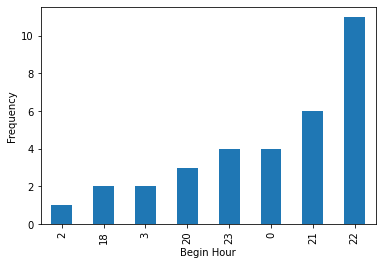

In [ ]:
df = label.sort_values('begin_hour', ascending = False).reset_index(drop=True)
bd_plot = df['begin_hour'].value_counts().sort_values().plot(kind='bar')
plt.xlabel("Begin Hour")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

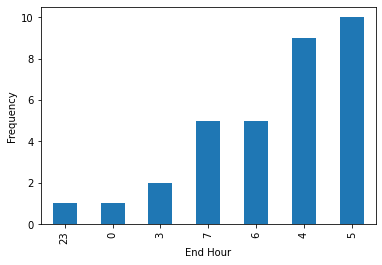

In [ ]:
bd_plot = df['end_hour'].value_counts().sort_values().plot(kind='bar')
plt.xlabel("End Hour")
plt.ylabel("Frequency")

Most of the time people start to sleep at 22 and wake up at 5

## Train-validation-test split

In [ ]:
import itertools
person_test = list(set([x for x in label['user'] if 'test' in x]))
person_train_val = list(set([x for x in label['user'] if 'test' not in x]))
val_cycle = itertools.cycle(person_train_val)
person_1 = next(val_cycle)
person_2 = next(val_cycle)
person_val = [person_1, person_2]
print(person_val)
i = 0
test_idx = []
train_idx = []
val_idx = []
for person in label['user']:
  if 'test' in person:
    test_idx.append(i)
  elif person in person_val:
    val_idx.append(i)
  else:
    train_idx.append(i)
  i = i + 1

label_train = label.iloc[train_idx]
label_test = label.iloc[test_idx]
label_val = label.iloc[val_idx]
#label_train = pd.DataFrame(data_train, columns=label.columns)
#print(person_train)
#for person in person_train:
#  pd.concat([label_train, label[label['user'] in person_train]])
train_files = list(set(label_train['user']))
test_files = list(set(label_test['user']))
val_files = list(set(label_val['user']))
print(train_files)

['patient_Diego', 'fongenae']
['Patient_svhoecke', 'patient_Jonas', 'patient_Emiel']


itertools: for cross-validation

In [ ]:
print(label['user'].unique())
print(test_files)

['patient_Jonas' 'Patient_svhoecke' 'fongenae' 'patient_Emiel'
 'Nicolas_test' 'patient_Diego' 'test_spring2021_internal_Jessica'
 'Celine_test']
['test_spring2021_internal_Jessica', 'Celine_test', 'Nicolas_test']


## View data

In [ ]:
emiel_noise = pd.read_csv('/content/drive/My Drive/data/patient_Emiel_noise_data.csv')
emiel_step = pd.read_csv('/content/drive/My Drive/data/patient_Emiel_step_data.csv')
emiel_screen = pd.read_csv('/content/drive/My Drive/data/patient_Emiel_screen_data.csv')
emiel_proximity = pd.read_csv('/content/drive/My Drive/data/patient_Emiel_proximity_data.csv')
emiel_light = pd.read_csv('/content/drive/My Drive/data/patient_Emiel_light_data.csv')
emiel_noise.info()
emiel_step.info()
emiel_screen.info()
emiel_proximity.info()
emiel_light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17941 entries, 0 to 17940
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  17941 non-null  object 
 1   source     17941 non-null  object 
 2   frequency  17941 non-null  float64
 3   amplitude  17941 non-null  float64
dtypes: float64(2), object(2)
memory usage: 560.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  773 non-null    object 
 1   source     773 non-null    object 
 2   steps      773 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     704 non-null    object
 1   source

# Concatenate dataframes of variables from each person

In [ ]:
def concat_df(files):
  data = []
  noise = pd.DataFrame(data, columns=emiel_noise.columns)
  step = pd.DataFrame(data, columns=emiel_step.columns)
  proximity = pd.DataFrame(data, columns=emiel_proximity.columns)
  screen = pd.DataFrame(data, columns=emiel_screen.columns)
  light = pd.DataFrame(data, columns=emiel_light.columns)
  for file in files:
    for filename in os.listdir('/content/drive/My Drive/data'):
      if file in filename:
        df = pd.read_csv(os.path.join('/content/drive/My Drive/data', filename))
        df['name'] = file
        df = to_date_time(df)
        if "noise" in filename:
          noise = pd.concat([noise, df], ignore_index=True)
        elif "step" in filename:
          step = pd.concat([step, df], ignore_index=True)
        elif "screen" in filename:
          screen = pd.concat([screen, df], ignore_index=True)
        elif "proximity" in filename:
          proximity = pd.concat([proximity, df], ignore_index=True)
        elif "light" in filename:
          light = pd.concat([light, df], ignore_index=True)
        else:
          print(filename)
          raise ValueError("New variables")
  return noise, step, screen, proximity, light
train_noise, train_step, train_screen, train_proximity, train_light = concat_df(train_files)
val_noise, val_step, val_screen, val_proximity, val_light = concat_df(train_files)
test_noise, test_step, test_screen, test_proximity, test_light = concat_df(train_files)

# Data visualization

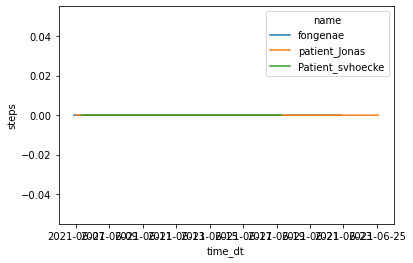

In [ ]:
sns.lineplot(data=train_step, x="time_dt", y="steps", hue="name")

Because step is the same for all persons, it is excluded.

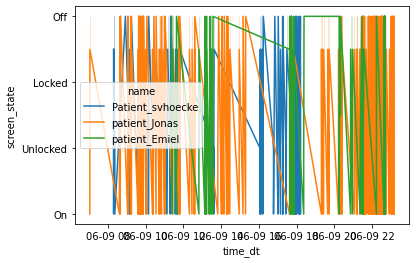

In [ ]:
screen_day=train_screen[train_screen['day']==9]
map_screen = {'On':0, 'Off':3, 'Locked':2, 'Unlocked':1}
train_screen['screen_state'] = train_screen['screen_state'].astype('str')
train_screen['screen_state'] = train_screen['screen_state'].replace(map_screen)
train_screen = train_screen.sort_values('time_dt', ascending = False).reset_index(drop=True)
val_screen['screen_state'] = val_screen['screen_state'].astype('str')
val_screen['screen_state'] = val_screen['screen_state'].replace(map_screen)
val_screen = val_screen.sort_values('time_dt', ascending = False).reset_index(drop=True)
test_screen['screen_state'] = test_screen['screen_state'].astype('str')
test_screen['screen_state'] = test_screen['screen_state'].replace(map_screen)
test_screen = test_screen.sort_values('time_dt', ascending = False).reset_index(drop=True)
sns.lineplot(data=screen_day, x="time_dt", y="screen_state", hue="name")

- It seems like the screen state was only recorded when it changed.
- From unlocked to lock or off may indicate the time the screen is on.

Text(0, 0.5, 'Frequency')

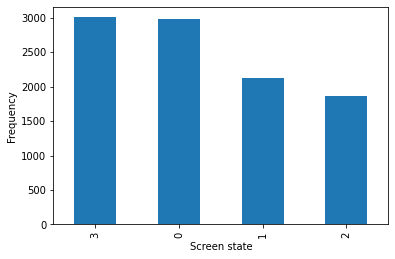

In [ ]:
train_screen['screen_state'].value_counts().plot(kind='bar')
plt.xlabel("Screen state")
plt.ylabel("Frequency")

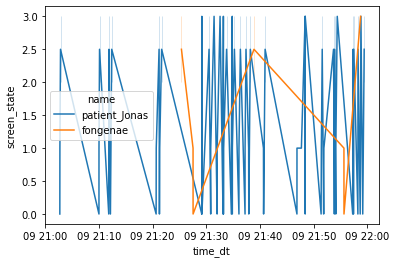

In [ ]:
screen_day_9 = train_screen[train_screen['day']== 9]
sns.lineplot(data=screen_day_9[screen_day_9['hour']== 21], x="time_dt", y="screen_state", hue="name")

The screen state can change several times in an hour

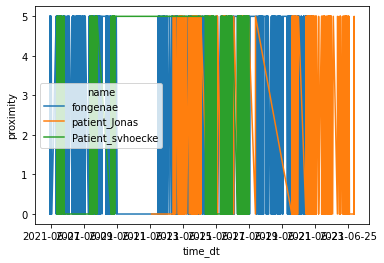

In [ ]:
screen_proximity = train_proximity[train_proximity['day']== 9]
sns.lineplot(data=train_proximity, x="time_dt", y="proximity", hue="name")

Text(0, 0.5, 'Frequency')

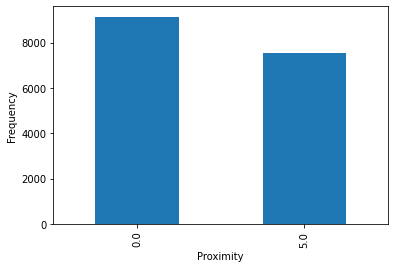

In [ ]:
train_proximity['proximity'].value_counts().plot(kind='bar')
plt.xlabel("Proximity")
plt.ylabel("Frequency")

The changes of proximity might indicate the movement of the patient

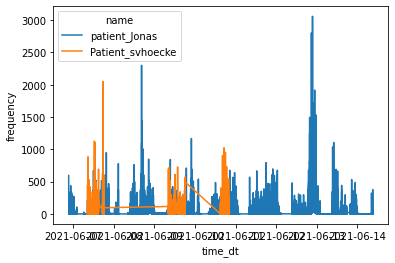

In [ ]:
sns.lineplot(data=train_noise, x="time_dt", y="frequency", hue="name")

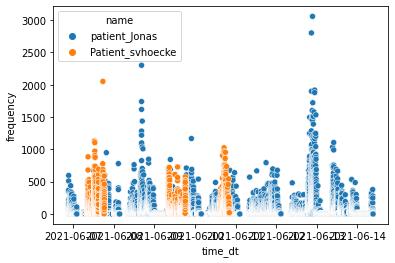

In [ ]:
sns.scatterplot(data=train_noise, x="time_dt", y="frequency", hue="name")

Missing value in patient svhoecke rather than 0



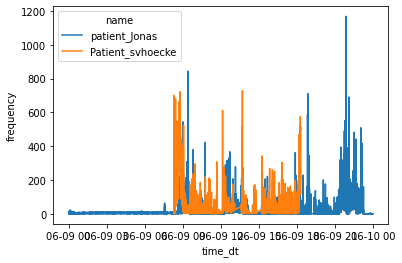

In [ ]:
sns.lineplot(data=train_noise[train_noise['day'] == 9], x="time_dt", y="frequency", hue="name")

 The high frequency might indicate awake

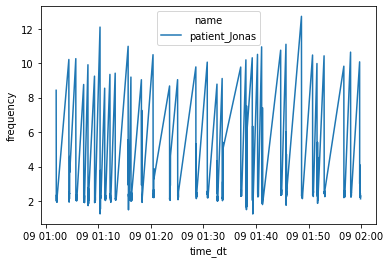

In [ ]:
noise_day_9 = train_noise[train_noise['day'] == 9]
sns.lineplot(data=noise_day_9[noise_day_9['hour'] == 1], x="time_dt", y="frequency", hue="name")

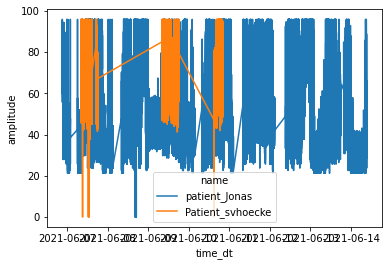

In [ ]:
sns.lineplot(data=train_noise, x="time_dt", y="amplitude", hue="name")

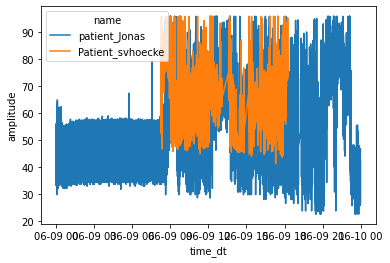

In [ ]:
sns.lineplot(data=train_noise[train_noise['day'] == 9], x="time_dt", y="amplitude", hue="name")

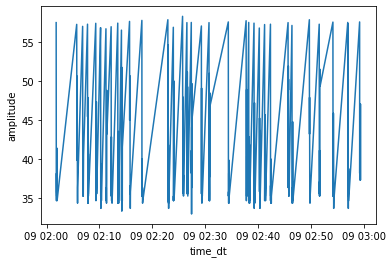

In [ ]:
noise_day_9=train_noise[train_noise['day'] == 9]
sns.lineplot(data=noise_day_9[noise_day_9['hour'] == 2], x="time_dt", y="amplitude")

Same as frequency, high value might indicate awake

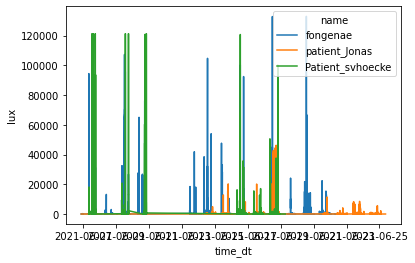

In [ ]:
sns.lineplot(data=train_light, x="time_dt", y="lux", hue="name")

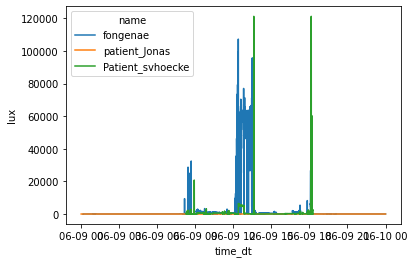

In [ ]:
sns.lineplot(data=train_light[train_light['day'] == 9], x="time_dt", y="lux", hue="name")

In [ ]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  33 non-null     int64         
 1   user        33 non-null     object        
 2   begin       33 non-null     int64         
 3   end         33 non-null     int64         
 4   begin_ts    33 non-null     datetime64[ns]
 5   end_ts      33 non-null     datetime64[ns]
 6   begin_day   33 non-null     int64         
 7   begin_hour  33 non-null     int64         
 8   end_day     33 non-null     int64         
 9   end_hour    33 non-null     int64         
dtypes: datetime64[ns](2), int64(7), object(1)
memory usage: 2.7+ KB


In [ ]:
label[label['begin_day']==9]

,Unnamed: 0,user,begin,end,begin_ts,end_ts,begin_day,begin_hour,end_day,end_hour
6,6,Patient_svhoecke,1623279185,1623299705,2021-06-09 22:53:05,2021-06-10 04:35:05,9,22,10,4
17,17,patient_Emiel,1623211188,1623222348,2021-06-09 03:59:48,2021-06-09 07:05:48,9,3,9,7
22,22,test_spring2021_internal_Jessica,1623278403,1623306483,2021-06-09 22:40:03,2021-06-10 06:28:03,9,22,10,6


There is consecutive time with low lux at night. According to the label of patient svhoecke, the end time of that duration does not correspond to the end time of the sleep, but may explain that why most people sleep at 22. 22 may be the fixed time to turn off light at the hospital.

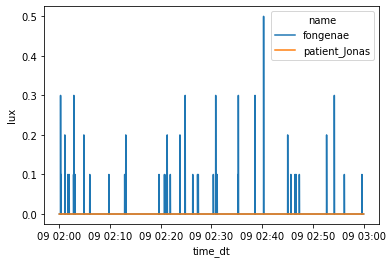

In [ ]:
light_day_9=train_light[train_light['day'] == 9]
sns.lineplot(data=light_day_9[light_day_9['hour']==2], x="time_dt", y="lux", hue="name")

In [ ]:
train_light.groupby('name').count()

,timestamp,source,lux,time_dt,day,hour
name,,,,,,
Patient_svhoecke,320969,320969,320969,320969,320969,320969
fongenae,1011075,1011075,1011075,1011075,1011075,1011075
patient_Jonas,1183127,1183127,1183127,1183127,1183127,1183127


The time that captures light is also inconsistant

Summary and why choose LSTM: 
1. Selected variables (step excluded) are changeable even in an hour and have numerous values for one patient in a day. The recording time is also inconsistent, and some patients miss some variables, some variables miss data in some time frame.
*   Solution: Feature engineering


 
2. All the variables from the past days may influence sleep today
*   Solution: Choose LSTM, and directly treat missing values as padding. 
 
3. Missing values in labels: only contains start time and end time of a patient on specific days, not consecutive
*   Solution: Model architecture


# Feature engineering: add all features to a data frame

The main idea is to separate 24 hours to day (9, 17) and night (0, 9) & (18, 24). At night, variables including light, frequency, amplitude, screen state and proximity might be closely related to the stages and quality of sleep but they have less effects in the daytime. So the values between 9 am to 4 pm is averaged as a single feature and the values every hour at night as a feature.
The main features are:
- the average lux, frequency, amplitude per hour
- the average change of frequency, amplitude, proximity, screen state per hour
- the duration of time screen being on per hour 


In [ ]:
data = []
columns = ['timestamp','name', 'screen_state', 'proximity', 'light', 'frequency', 'amplitude']

In [ ]:
def diff(col):
  diffs = []
  for i in range(0, len(col)-1):
    diff = col[i+1] - col[i]
    if diff == 0:
      diffs.append(0)
    else:
      diffs.append(1)
  diffs.append(0)
  return diffs

def diff_num(col):
  diffs = []
  for i in range(0, len(col)-1):
    diff = col[i+1] - col[i]
    diffs.append(abs(diff))
  diffs.append(0)  
  return diffs

In [ ]:
train_proximity['diff_pro'] = diff(train_proximity['proximity'])
train_screen['diff_screen'] = diff(train_screen['screen_state'])
train_light['diff_lux'] = diff_num(train_light['lux'])
train_noise['diff_frequency'] = diff_num(train_noise['frequency'])
train_noise['diff_amplitude'] = diff_num(train_noise['amplitude'])

In [ ]:
val_proximity['diff_pro'] = diff(val_proximity['proximity'])
val_screen['diff_screen'] = diff(val_screen['screen_state'])
val_light['diff_lux'] = diff_num(val_light['lux'])
val_noise['diff_frequency'] = diff_num(val_noise['frequency'])
val_noise['diff_amplitude'] = diff_num(val_noise['amplitude'])

In [ ]:
test_proximity['diff_pro'] = diff(test_proximity['proximity'])
test_screen['diff_screen'] = diff(test_screen['screen_state'])
test_light['diff_lux'] = diff_num(test_light['lux'])
test_noise['diff_frequency'] = diff_num(test_noise['frequency'])
test_noise['diff_amplitude'] = diff_num(test_noise['amplitude'])

In [ ]:
def screen_time_features(data, train_proximity, name, train_files):
  proximity_intervals = []
  for person in train_files:
    train_proximity_person = train_proximity[train_proximity['name'] == person]
    for i in range(6, 24):
      proximity_18 = 0
      proximity_19 = 0
      proximity_20 = 0
      proximity_21 = 0
      proximity_22 = 0
      proximity_23 = 0
      proximity_0 = 0
      proximity_1 = 0
      proximity_2 = 0
      proximity_3 = 0
      proximity_4 = 0
      proximity_5 = 0
      proximity_6 = 0
      proximity_7 = 0
      proximity_8 = 0
      proximity_day = 0
      a = 1
      proximity_interval = [proximity_day, proximity_0, proximity_1, proximity_2, proximity_3, proximity_4, proximity_5, proximity_6, proximity_7, proximity_8, proximity_18, proximity_19, proximity_20, proximity_21, proximity_22, proximity_23]  
      if i in train_proximity['day'].unique():
        train_proximity_day = train_proximity_person[train_proximity_person['day'] == i]
        for j in range(9, 18):
          if j in train_proximity['hour'].unique():
            train_proximity_hour = train_proximity_day[train_proximity_day['hour'] == j]
            train_proximity_hour.index = range(0, len(train_proximity_hour))
            for k in range(0, len(train_proximity_hour)-1):
              if train_proximity_hour['screen_state'][k] == 0 & (train_proximity_hour['screen_state'][k+1] == 2 | train_proximity_hour['screen_state'][k+1] == 3):
                proximity_interval[0] = proximity_interval[0] + abs((train_proximity_hour['time_dt'][k+1]-train_proximity_hour['time_dt'][k]).total_seconds())
        for j in list(range(0, 9)) + list(range(18, 24)):
          if j in train_proximity['hour'].unique():
            train_proximity_hour = train_proximity_day[train_proximity_day['hour'] == j]
            train_proximity_hour.index = range(0, len(train_proximity_hour))
            for k in range(0, len(train_proximity_hour)-1):
              if train_proximity_hour['screen_state'][k] == 0 & (train_proximity_hour['screen_state'][k+1] == 2 | train_proximity_hour['screen_state'][k+1] == 3):
                proximity_interval[a] = proximity_day + abs((train_proximity_hour['time_dt'][k+1]-train_proximity_hour['time_dt'][k]).total_seconds())
          a = a + 1                                         
      proximity_intervals.append(proximity_interval)
  data = add_features(data, proximity_intervals, name)
  return data
  
def proximity_screen_features(data, train_proximity, diff, train_files):
  proximity_intervals = []
  for person in train_files:
    train_proximity_person = train_proximity[train_proximity['name'] == person]
    for i in range(6, 24):
      proximity_18 = 0
      proximity_19 = 0
      proximity_20 = 0
      proximity_21 = 0
      proximity_22 = 0
      proximity_23 = 0
      proximity_0 = 0
      proximity_1 = 0
      proximity_2 = 0
      proximity_3 = 0
      proximity_4 = 0
      proximity_5 = 0
      proximity_6 = 0
      proximity_7 = 0
      proximity_8 = 0
      proximity_day = 0
      proximity_interval = [proximity_day, proximity_0, proximity_1, proximity_2, proximity_3, proximity_4, proximity_5, proximity_6, proximity_7, proximity_8, proximity_18, proximity_19, proximity_20, proximity_21, proximity_22, proximity_23]  
      if i in train_proximity['day'].unique():
        train_proximity_day = train_proximity_person[train_proximity_person['day'] == i]
        for j in range(9, 18):
          if j in train_proximity['hour'].unique():
            train_proximity_hour = train_proximity_day[train_proximity_day['hour'] == j]
            if 'diff' in diff:
              proximity_interval[0] = proximity_interval[0] + train_proximity_hour[diff].sum()
        a = 1
        for j in list(range(0, 9)) + list(range(18, 24)):
          if j in train_proximity['hour'].unique():
            train_proximity_hour = train_proximity_day[train_proximity_day['hour'] == j]
            proximity_interval[a] = proximity_interval[a] + train_proximity_hour[diff].sum()
          a = a + 1
      proximity_intervals.append(proximity_interval)
  data = add_features(data, proximity_intervals, diff)
  return data

def add_features(data, proximity_intervals, diff):
  proximity_interverse = []
  proximity_18 = []
  proximity_19 = []
  proximity_20 = []
  proximity_21 = []
  proximity_22 = []
  proximity_23 = []
  proximity_0 = []
  proximity_1 = []
  proximity_2 = []
  proximity_3 = []
  proximity_4 = []
  proximity_5 = []
  proximity_6 = []
  proximity_7 = []
  proximity_8 = []
  proximity_day = []
  for lis in proximity_intervals:
    proximity_day.append(lis[0] / 9)
    proximity_0.append(lis[1])
    proximity_1.append(lis[2])
    proximity_2.append(lis[3])
    proximity_3.append(lis[4])
    proximity_4.append(lis[5])
    proximity_5.append(lis[6])
    proximity_6.append(lis[7])
    proximity_7.append(lis[8])
    proximity_8.append(lis[9])
    proximity_18.append(lis[10])
    proximity_19.append(lis[11])
    proximity_20.append(lis[12])
    proximity_21.append(lis[13])
    proximity_22.append(lis[14])
    proximity_23.append(lis[15])
  if diff == 'diff_pro':
    data['proximity_day_diff'] = proximity_day
    data['proximity_0_diff'] = proximity_0
    data['proximity_1_diff'] = proximity_1
    data['proximity_2_diff'] = proximity_2
    data['proximity_3_diff'] = proximity_3
    data['proximity_4_diff'] = proximity_4
    data['proximity_5_diff'] = proximity_5
    data['proximity_6_diff'] = proximity_6
    data['proximity_7_diff'] = proximity_7
    data['proximity_8_diff'] = proximity_8
    data['proximity_18_diff'] = proximity_18
    data['proximity_19_diff'] = proximity_19
    data['proximity_20_diff'] = proximity_20
    data['proximity_21_diff'] = proximity_21
    data['proximity_22_diff'] = proximity_22
    data['proximity_23_diff'] = proximity_23
  elif diff == 'diff_screen':
    data['screen_state_day_diff'] = proximity_day
    data['screen_state_0_diff'] = proximity_0
    data['screen_state_1_diff'] = proximity_1
    data['screen_state_2_diff'] = proximity_2
    data['screen_state_3_diff'] = proximity_3
    data['screen_state_4_diff'] = proximity_4
    data['screen_state_5_diff'] = proximity_5
    data['screen_state_6_diff'] = proximity_6
    data['screen_state_7_diff'] = proximity_7
    data['screen_state_8_diff'] = proximity_8
    data['screen_state_18_diff'] = proximity_18
    data['screen_state_19_diff'] = proximity_19
    data['screen_state_20_diff'] = proximity_20
    data['screen_state_21_diff'] = proximity_21
    data['screen_state_22_diff'] = proximity_22
    data['screen_state_23_diff'] = proximity_23
  elif diff == 'lux':
    data['lux_day'] = proximity_day
    data['lux_0'] = proximity_0
    data['lux_1'] = proximity_1
    data['lux_2'] = proximity_2
    data['lux_3'] = proximity_3
    data['lux_4'] = proximity_4
    data['lux_5'] = proximity_5
    data['lux_6'] = proximity_6
    data['lux_7'] = proximity_7
    data['lux_8'] = proximity_8
    data['lux_18'] = proximity_18
    data['lux_19'] = proximity_19
    data['lux_20'] = proximity_20
    data['lux_21'] = proximity_21
    data['lux_22'] = proximity_22
    data['lux_23'] = proximity_23
  elif diff == 'diff_lux':
    data['lux_day_diff'] = proximity_day
    data['lux_0_diff'] = proximity_0
    data['lux_0_diff'] = proximity_0
    data['lux_1_diff'] = proximity_1
    data['lux_2_diff'] = proximity_2
    data['lux_3_diff'] = proximity_3
    data['lux_4_diff'] = proximity_4
    data['lux_5_diff'] = proximity_5
    data['lux_6_diff'] = proximity_6
    data['lux_7_diff'] = proximity_7
    data['lux_8_diff'] = proximity_8
    data['lux_18_diff'] = proximity_18
    data['lux_19_diff'] = proximity_19
    data['lux_20_diff'] = proximity_20
    data['lux_21_diff'] = proximity_21
    data['lux_22_diff'] = proximity_22
    data['lux_23_diff'] = proximity_23
  elif diff == 'frequency':
    data['frequency_day'] = proximity_day
    data['frequency_0'] = proximity_0
    data['frequency_1'] = proximity_1
    data['frequency_2'] = proximity_2
    data['frequency_3'] = proximity_3
    data['frequency_4'] = proximity_4
    data['frequency_5'] = proximity_5
    data['frequency_6'] = proximity_6
    data['frequency_7'] = proximity_7
    data['frequency_8'] = proximity_8
    data['frequency_18'] = proximity_18
    data['frequency_19'] = proximity_19
    data['frequency_20'] = proximity_20
    data['frequency_21'] = proximity_21
    data['frequency_22'] = proximity_22
    data['frequency_23'] = proximity_23
  elif diff == 'diff_frequency':
    data['frequency_day_diff'] = proximity_day
    data['frequency_0_diff'] = proximity_0
    data['frequency_1_diff'] = proximity_1
    data['frequency_2_diff'] = proximity_2
    data['frequency_3_diff'] = proximity_3
    data['frequency_4_diff'] = proximity_4
    data['frequency_5_diff'] = proximity_5
    data['frequency_6_diff'] = proximity_6
    data['frequency_7_diff'] = proximity_7
    data['frequency_8_diff'] = proximity_8
    data['frequency_18_diff'] = proximity_18
    data['frequency_19_diff'] = proximity_19
    data['frequency_20_diff'] = proximity_20
    data['frequency_21_diff'] = proximity_21
    data['frequency_22_diff'] = proximity_22
    data['frequency_23_diff'] = proximity_23
  elif diff == 'amplitude':
    data['amplitude_day'] = proximity_day
    data['amplitude_0'] = proximity_0
    data['amplitude_1'] = proximity_1
    data['amplitude_2'] = proximity_2
    data['amplitude_3'] = proximity_3
    data['amplitude_4'] = proximity_4
    data['amplitude_5'] = proximity_5
    data['amplitude_6'] = proximity_6
    data['amplitude_7'] = proximity_7
    data['amplitude_8'] = proximity_8
    data['amplitude_18'] = proximity_18
    data['amplitude_19'] = proximity_19
    data['amplitude_20'] = proximity_20
    data['amplitude_21'] = proximity_21
    data['amplitude_22'] = proximity_22
    data['amplitude_23'] = proximity_23
  elif diff == 'diff_amplitude':
    data['amplitude_day_diff'] = proximity_day
    data['amplitude_0_diff'] = proximity_0
    data['amplitude_1_diff'] = proximity_1
    data['amplitude_2_diff'] = proximity_2
    data['amplitude_3_diff'] = proximity_3
    data['amplitude_4_diff'] = proximity_4
    data['amplitude_5_diff'] = proximity_5
    data['amplitude_6_diff'] = proximity_6
    data['amplitude_7_diff'] = proximity_7
    data['amplitude_8_diff'] = proximity_8
    data['amplitude_18_diff'] = proximity_18
    data['amplitude_19_diff'] = proximity_19
    data['amplitude_20_diff'] = proximity_20
    data['amplitude_21_diff'] = proximity_21
    data['amplitude_22_diff'] = proximity_22
    data['amplitude_23_diff'] = proximity_23
  elif diff == 'screen_on_time':
    data['screen_on_time_day_diff'] = proximity_day
    data['screen_on_time_0_diff'] = proximity_0
    data['screen_on_time_1_diff'] = proximity_1
    data['screen_on_time_2_diff'] = proximity_2
    data['screen_on_time_3_diff'] = proximity_3
    data['screen_on_time_4_diff'] = proximity_4
    data['screen_on_time_5_diff'] = proximity_5
    data['screen_on_time_6_diff'] = proximity_6
    data['screen_on_time_7_diff'] = proximity_7
    data['screen_on_time_8_diff'] = proximity_8
    data['screen_on_time_18_diff'] = proximity_18
    data['screen_on_time_19_diff'] = proximity_19
    data['screen_on_time_20_diff'] = proximity_20
    data['screen_on_time_21_diff'] = proximity_21
    data['screen_on_time_22_diff'] = proximity_22
    data['screen_on_time_23_diff'] = proximity_23

  return data

def diff_numeric_variables(data, train_proximity, diff, train_files):
  proximity_intervals = []
  for person in train_files:
    train_proximity_person = train_proximity[train_proximity['name'] == person]
    for i in range(6, 24):
      proximity_18 = 0
      proximity_19 = 0
      proximity_20 = 0
      proximity_21 = 0
      proximity_22 = 0
      proximity_23 = 0
      proximity_0 = 0
      proximity_1 = 0
      proximity_2 = 0
      proximity_3 = 0
      proximity_4 = 0
      proximity_5 = 0
      proximity_6 = 0
      proximity_7 = 0
      proximity_8 = 0
      proximity_day = 0
      proximity_interval = [proximity_day, proximity_0, proximity_1, proximity_2, proximity_3, proximity_4, proximity_5, proximity_6, proximity_7, proximity_8, proximity_18, proximity_19, proximity_20, proximity_21, proximity_22, proximity_23]  
      if i in train_proximity['day'].unique():
        train_proximity_day = train_proximity_person[train_proximity_person['day'] == i]
        for j in range(9, 18):
          if j in train_proximity['hour'].unique():
            train_proximity_hour = train_proximity_day[train_proximity_day['hour'] == j]
            proximity_interval[0] = proximity_interval[0] + train_proximity_hour[diff].sum()
        a = 1
        for j in list(range(0, 9)) + list(range(18, 24)):
          if j in train_proximity['hour'].unique():
            train_proximity_hour = train_proximity_day[train_proximity_day['hour'] == j]
            proximity_interval[a] = proximity_interval[a] + train_proximity_hour[diff].sum()
          a = a + 1
      proximity_intervals.append(proximity_interval)
  data = add_features(data, proximity_intervals, diff)
  return data

## Build model

model.png

Two-task learning: let the model output two values: start time and end time

In [ ]:
def create_data_tensor(df):
  persons = []
  i = 0
  for person in df[0].unique():
    df_1 = df[df[0] == person] 
    days = []
    for day in df_1['day'].unique():
      df_2 = df_1[df_1['day'] == day] 
      a = df_2.loc[i, :].values.tolist()
      del a[0:2]
      days.append(a)
      i = i + 1
    persons.append(days)
    x = torch.FloatTensor(persons)
  return x

def create_label_tensor(label, files):
  label_lists = []
  for person in files:
    label_person = label[label['name'] == person]
    label_list = []
    hour = 0
    for i in range(6, 24):
      if i in label_person['begin_hour'].unique():
        label_hour = label_person[label_person['begin_hour'] == i]
        begin = label_hour['begin'].tolist()[0]
        end = label_hour['end'].tolist()[0]
        label_list.append([begin, end, 1, 1])
      else:
        label_list.append([0, 0, 0, 0])
    label_lists.append(label_list)
    y = torch.FloatTensor(label_lists)
  return y

def create_batch(x, y, batch_size=1):
  person, hour, feature = x.size()
  data = []
  label = []
  if batch_size == 1:
    for i in range(0, person):
      data.append(x[i].unsqueeze(0))
      label.append(y[i].unsqueeze(0))
  elif batch_size == 2:
    for i in range(0, person-1):
      data.append(x[i:i+2])
      if person % 2 == 1:
        data.append(x[-1].unsqueeze(0))
  elif batch_size == 3:
    for i in range(0, person-2):
      data.append(x[i:i+3])
      if person % 3 == 1:
        data.append(x[-1].unsqueeze(0))
      if person % 3 == 2:
        data.append(x[-2:].unsqueeze(0))
  else:
    raise ValueError("batch size exceed training samples")
  return data, label

In [ ]:
def create_batch_all(train_files, train_proximity, train_screen, train_light, train_noise):
  train_user = [i for i in train_files for _ in range(18)]
  train = pd.DataFrame(train_user)
  train_days = list(range(6, 24))
  train['day'] = train_days * len(train_files)
  train = proximity_screen_features(train, train_proximity, 'diff_pro', train_files)
  train = proximity_screen_features(train, train_screen, 'diff_screen', train_files)
  train = diff_numeric_variables(train, train_light, 'diff_lux', train_files)
  train = diff_numeric_variables(train, train_noise, 'diff_frequency', train_files)
  train = diff_numeric_variables(train, train_noise, 'diff_amplitude', train_files)
  train = diff_numeric_variables(train, train_noise, 'frequency', train_files)
  train = diff_numeric_variables(train, train_noise, 'amplitude', train_files)
  train = screen_time_features(train, train_screen, 'screen_on_time', train_files)
  x = create_data_tensor(train)
  y = create_label_tensor(label, train_files)
  print(x.size())
  data_x, label_y = create_batch(x, y)
  return data_x, label_y

In [ ]:
name = ['patient_Jonas']*5 + ['Patient_svhoecke']*4 + ['fongenae']*8 + ['patient_Emiel']*3 + ['Nicolas_test'] + ['patient_Diego'] + ['test_spring2021_internal_Jessica']*3 + ['Celine_test']*8
label['name'] = name
data_x, label_y = create_batch_all(train_files, train_proximity, train_screen, train_light, train_noise)
val_x, val_y = create_batch_all(val_files, val_proximity, val_screen, val_light, val_noise)
test_x, test_y = create_batch_all(test_files, test_proximity, test_screen, test_light, test_noise)

torch.Size([3, 18, 128])
torch.Size([2, 18, 128])
torch.Size([3, 18, 128])


In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=112, hidden_layer_size=50, output_size=2, bidirectional = True, dropout=0.1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size, dropout= dropout, bidirectional=bidirectional, batch_first=True)
        if bidirectional:
          self.linear = nn.Linear(hidden_layer_size*2, output_size)
        else:
          self.linear = nn.Linear(hidden_layer_size, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        #lstm_out = self.dropout(0.1)
        lstm_out = self.relu(lstm_out)
        predictions = self.linear(lstm_out)
        return predictions

In [ ]:
def eval_test(val_x, val_y, features, model, loss_function):
  model.eval()
  with torch.no_grad():
      loss_starts = 0
      loss_ends = 0
      for seq, labels in zip(val_x, val_y):
        batch, day, features = seq.size()
        seq_normalized = scaler.fit_transform(seq.reshape(-1, features))    
        seq = torch.FloatTensor(seq_normalized.reshape(batch, day, features))
        y_pred = model(seq)
        y_pred = ((y_pred[:, :, 0:2].sum(axis=1))/(labels[:, :, 2:4]).sum(axis=1))
        label = labels[:, :, 0:2]
        loss = loss_function(y_pred, label)
        loss_start = loss_function(y_pred[:, 0], label[:, 0])
        loss_end = loss_function(y_pred[:, 1], label[:, 1])
        loss_starts += loss_start
        loss_ends += loss_end
  return loss_starts, loss_ends

In [ ]:
model = LSTM(input_size=128, bidirectional = False)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.1)
epochs = 50
from sklearn.preprocessing import MinMaxScaler
features = 128
scaler = MinMaxScaler(feature_range=(-1, 1))
for i in range(epochs):
    model.train()
    for seq, labels in zip(data_x, label_y):
        optimizer.zero_grad()
        batch, day, features = seq.size()
        seq_normalized = scaler.fit_transform(seq.reshape(-1, features))    
        seq = torch.FloatTensor(seq_normalized.reshape(batch, day, features))
        y_pred = model(seq)
        y_pred = (y_pred[:, :, 0:2])*(labels[:, :, 2:4])
        y_pred = (y_pred[:, :, 0:2].sum(axis=1))/(labels[:, :, 2:4]).sum(axis=1)
        label = (labels[:, :, 0:2].sum(axis=1))/(labels[:, :, 2:4]).sum(axis=1)
        loss = loss_function(y_pred, label)
        print(f'loss: {loss.item():10.8f}')
        loss_start = loss_function(y_pred[:, 0], label[:, 0])
        loss_end = loss_function(y_pred[:, 1], label[:, 1])
        loss.backward()
        optimizer.step()
    if i%25 == 1:
        print(f'epoch: {i:3} loss: {loss.item():10.8f}')
    loss_starts, loss_ends = eval_test(val_x, val_y, features, model, loss_function)   
    print(f'epoch: {i:3} loss: {loss.item():10.8f}')
    print(f'epoch: {i:3} start_mse: {loss_starts:10.8f}')
    print(f'epoch: {i:3} end_mse: {loss_ends:10.8f}')   

loss_starts_test, loss_ends_test = eval_test(test_x, test_y, features, model, loss_function)    

print(f'test_start_mse: {loss_starts_test:10.10f}')
print(f'test_end_mse: {loss_ends_test:10.10f}')


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 18, 2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/d

loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:   0 loss: 2634775381680324608.00000000
epoch:   0 start_mse: 29.35381126
epoch:   0 end_mse: 42.02537537
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:   1 loss: 2634775381680324608.00000000
epoch:   1 loss: 2634775381680324608.00000000
epoch:   1 start_mse: 60.23226166
epoch:   1 end_mse: 137.08695984
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:   2 loss: 2634775381680324608.00000000
epoch:   2 start_mse: 111.83719635
epoch:   2 end_mse: 259.62677002
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:   3 loss: 2634775381680324608.00000000
epoch:   3 start_mse: 173.79159546
epoch:   3 end_mse: 385.68740845
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 26347

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 18, 2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 18, 2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(i

loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  18 loss: 2634775381680324608.00000000
epoch:  18 start_mse: 1506.07299805
epoch:  18 end_mse: 1970.99438477
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  19 loss: 2634775381680324608.00000000
epoch:  19 start_mse: 1607.52490234
epoch:  19 end_mse: 2086.95117188
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  20 loss: 2634775381680324608.00000000
epoch:  20 start_mse: 1711.56298828
epoch:  20 end_mse: 2205.40454102
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  21 loss: 2634775381680324608.00000000
epoch:  21 start_mse: 1818.19604492
epoch:  21 end_mse: 2326.36889648
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  22 loss: 2634775381680324608.00000000


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 18, 2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 18, 2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(i

epoch:  26 loss: 2634775381680324608.00000000
epoch:  26 start_mse: 2390.43676758
epoch:  26 end_mse: 2969.20776367
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  27 loss: 2634775381680324608.00000000
epoch:  27 start_mse: 2512.71752930
epoch:  27 end_mse: 3105.43188477
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  28 loss: 2634775381680324608.00000000
epoch:  28 start_mse: 2637.61523438
epoch:  28 end_mse: 3244.22338867
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  29 loss: 2634775381680324608.00000000
epoch:  29 start_mse: 2765.13012695
epoch:  29 end_mse: 3385.58618164
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  30 loss: 2634775381680324608.00000000
epoch:  30 start_mse: 2895.26489258
epoch:  30 end_mse: 3529.52758789


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 18, 2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 18, 2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(i

epoch:  35 loss: 2634775381680324608.00000000
epoch:  35 start_mse: 3585.27709961
epoch:  35 end_mse: 4288.01904297
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  36 loss: 2634775381680324608.00000000
epoch:  36 start_mse: 3731.15405273
epoch:  36 end_mse: 4447.49658203
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  37 loss: 2634775381680324608.00000000
epoch:  37 start_mse: 3879.65527344
epoch:  37 end_mse: 4609.56982422
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  38 loss: 2634775381680324608.00000000
epoch:  38 start_mse: 4030.78173828
epoch:  38 end_mse: 4774.24560547
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  39 loss: 2634775381680324608.00000000
epoch:  39 start_mse: 4184.53417969
epoch:  39 end_mse: 4941.52148438


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 18, 2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 18, 2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(i

epoch:  42 loss: 2634775381680324608.00000000
epoch:  42 start_mse: 4661.54101562
epoch:  42 end_mse: 5458.96435547
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  43 loss: 2634775381680324608.00000000
epoch:  43 start_mse: 4825.79345703
epoch:  43 end_mse: 5636.65429688
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  44 loss: 2634775381680324608.00000000
epoch:  44 start_mse: 4992.66796875
epoch:  44 end_mse: 5816.95019531
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  45 loss: 2634775381680324608.00000000
epoch:  45 start_mse: 5162.16845703
epoch:  45 end_mse: 5999.84960938
loss: 2636186329976668160.00000000
loss: 2637468085656748032.00000000
loss: 2634775381680324608.00000000
epoch:  46 loss: 2634775381680324608.00000000
epoch:  46 start_mse: 5334.28955078
epoch:  46 end_mse: 6185.35693359


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 18, 2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, t